In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df = pd.read_csv("/content/animal_dataset.csv")
df

,Temperature,HeartRate,Weight,Sensor1,Sensor2,AnimalType,Label
0,38.748357,86.996777,143.248217,31.184385,70.682532,Dog,1
1,38.430868,84.623168,148.554813,33.279230,74.843983,Cow,1
2,38.823844,80.298152,142.075801,34.172789,75.090084,Dog,1
3,39.261515,76.765316,146.920385,38.775375,77.363152,Sheep,0
4,38.382923,83.491117,131.063853,36.113106,68.165708,Dog,0
...,...,...,...,...,...,...,...
995,38.359450,85.350751,150.774805,35.056915,74.755175,Sheep,1
996,39.398843,79.867394,152.577525,30.844376,78.557053,Sheep,1
997,38.820421,75.590627,137.582394,34.359404,90.564551,Cow,0
998,38.214411,79.184665,153.341764,38.286756,79.040181,Sheep,1


from matplotlib import pyplot as plt
df['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['HeartRate'].plot(kind='hist', bins=20, title='HeartRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Sensor1'].plot(kind='hist', bins=20, title='Sensor1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('AnimalType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='HeartRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='HeartRate', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Weight', y='Sensor1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sensor1', y='Sensor2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['HeartRate'].plot(kind='line', figsize=(8, 4), title='HeartRate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Sensor1'].plot(kind='line', figsize=(8, 4), title='Sensor1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['AnimalType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Temperature', y='AnimalType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['AnimalType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='HeartRate', y='AnimalType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['AnimalType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Weight', y='AnimalType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['AnimalType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Sensor1', y='AnimalType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

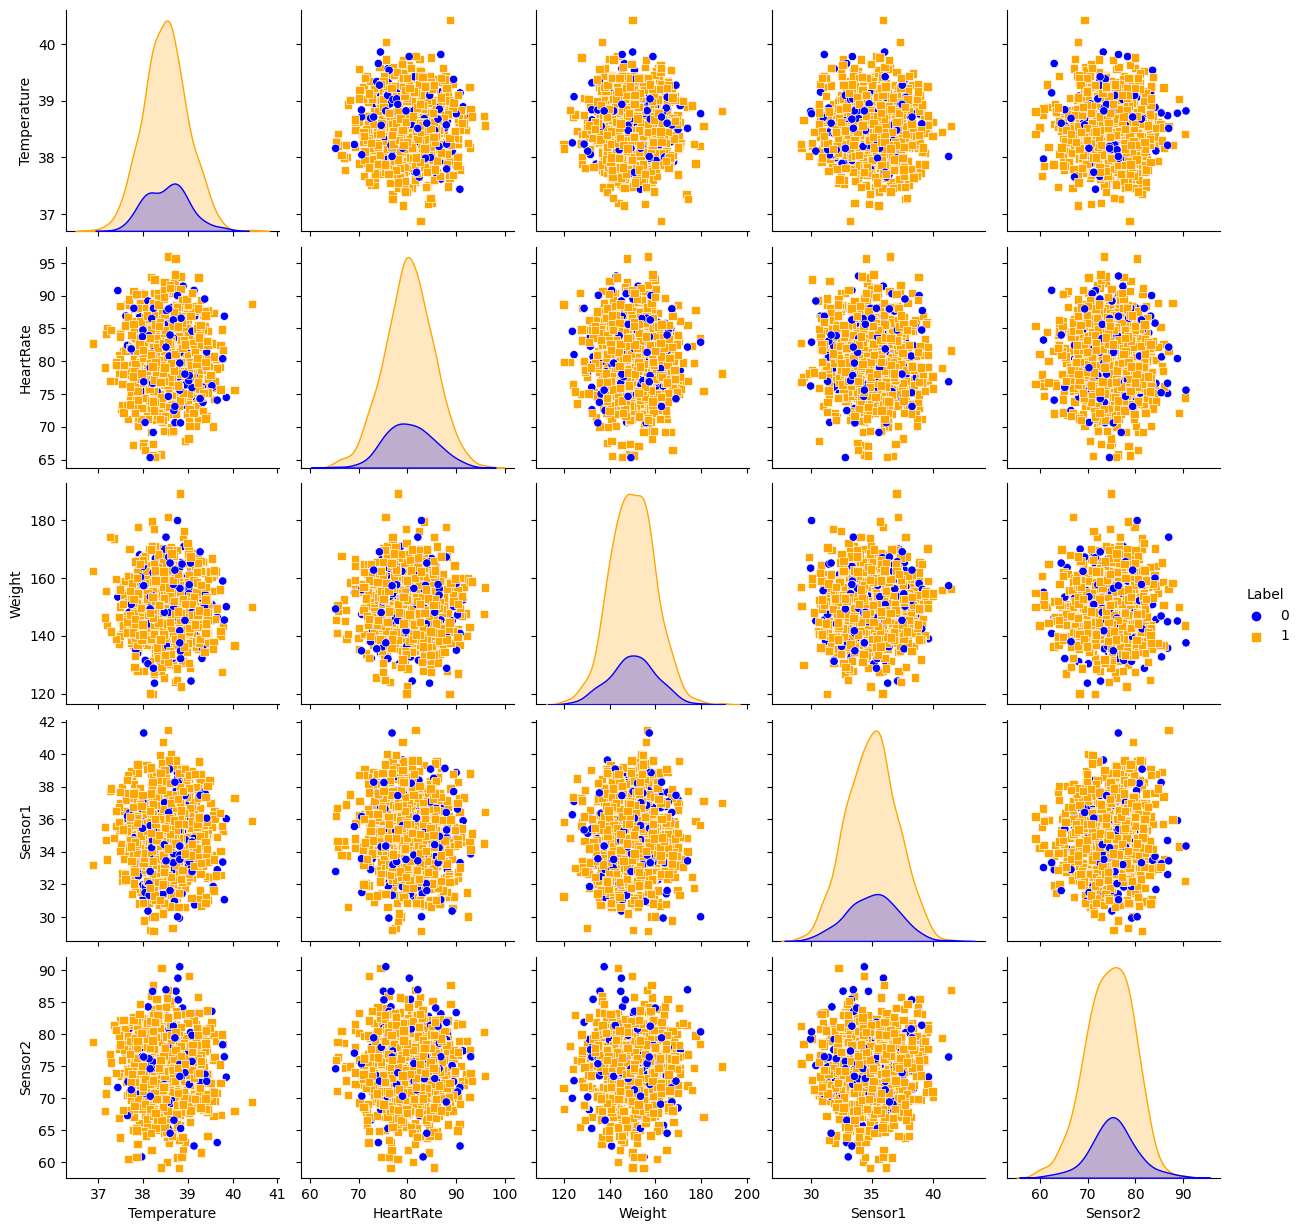

In [ ]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='Label', markers=['o', 's'], palette={0: 'blue', 1: 'orange'})


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the modified dataset from the CSV file
csv_filename = 'animal_dataset.csv'
df = pd.read_csv(csv_filename)

# Separate features and labels
X = df.drop(['AnimalType', 'Label'], axis=1)
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Save the trained model to a file
model_filename = 'animal_decision_tree_model.joblib'
joblib.dump(model, model_filename)
print(f"Trained model saved to {model_filename}")

Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.12      0.11        33
           1       0.82      0.78      0.80       167

    accuracy                           0.68       200
   macro avg       0.46      0.45      0.46       200
weighted avg       0.70      0.68      0.69       200

Trained model saved to animal_decision_tree_model.joblib
